In [74]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-analysis')
jovian.set_colab_id('10C2dKNylq0pkn8ch4hivhRIzn5_13bKa')

# US Accident Analysis



In [75]:
!pip install jovian --upgrade --quiet

In [76]:
import jovian

In [77]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-analysis")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/gopushaji/us-accident-analysis


'https://jovian.ai/gopushaji/us-accident-analysis'

# Exploratory Data Analysis

Source: Kaggle Dataset

Information: About accidents

Use: To prevent accidents using insights from data

Notes: We have data about only 49 out of 50 states of the US. Data about New York is missing

## Download The Data

In [78]:
!pip install opendatasets --upgrade --quiet    
 #installing opendatasets library to download data from sources like kaggle

In [79]:
import opendatasets as od
download_url ='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [80]:
data_filename = '/content/us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preparation and Cleaning


*   Load file using Pandas
*   Look at some information about the data
*   Fix any Missing or incorrect values






In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
df = pd.read_csv(data_filename)

###Data Information

In [83]:
df.head(3)

ID  Severity  ... Nautical_Twilight Astronomical_Twilight
0  A-2716600         3  ...             Night                 Night
1  A-2716601         2  ...             Night                 Night
2  A-2716602         2  ...             Night                   Day

[3 rows x 47 columns]

In [84]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [85]:
len(df.columns)

47

In [86]:
sample_df= df.sample(frac=0.1)  # creates a 10% sample of the data set

In [87]:
len(df)

1516064

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [89]:
round(df.describe(),3)

Severity    Start_Lat  ...  Wind_Speed(mph)  Precipitation(in)
count  1516064.000  1516064.000  ...      1387202.000        1005515.000
mean         2.239       36.901  ...            7.631              0.008
std          0.608        5.166  ...            5.637              0.129
min          1.000       24.570  ...            0.000              0.000
25%          2.000       33.854  ...            4.600              0.000
50%          2.000       37.351  ...            7.000              0.000
75%          2.000       40.726  ...           10.400              0.000
max          4.000       49.001  ...          984.000             24.000

[8 rows x 14 columns]

In [90]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

len(df.select_dtypes(include=numerics).columns)


14

###Percentage of Missing Values per column

In [91]:
missing_perc=df.isnull().sum().sort_values(ascending = False)*100/len(df)
missing_perc=missing_perc[missing_perc!=0]
missing_perc

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
dtype: float64

###Which columns has missing values that occur more than half of the number of observations

In [92]:
missing=df.isnull().sum()
missing[missing>(len(df)/2)]

Number    1046095
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

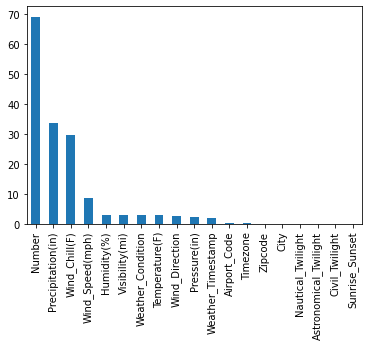

In [93]:
missing_perc.plot(kind='bar')
plt.xticks(rotation=90)

###Remove columns on which analysis shall not be carried out

In [94]:
df.drop('Number',inplace=True,axis=1)

## Exploratory Analysis and Visualuzation

Columns we will analyze

1 City

2 Start Time

3 Start Lat, Start Lon

4 Distance

5 Weather Condition

### City

In [95]:
cities = df['City'].unique()
df['City'].nunique()

10657

In [96]:
cities_by_accident = df.City.value_counts().sort_values(ascending= False)
cities_by_accident.head(25)

Los Angeles       39984
Miami             36233
Charlotte         22203
Houston           20843
Dallas            19497
Sacramento        18431
Orlando           16169
Portland          14805
San Diego         14090
Minneapolis       12653
Atlanta           11854
Chicago           11507
Saint Paul        10084
Phoenix            9934
Raleigh            9516
San Jose           9362
Richmond           8472
Nashville          8381
Riverside          8201
Jacksonville       7815
Salt Lake City     7737
Kansas City        7500
Baton Rouge        7085
Austin             7038
Oakland            6978
Name: City, dtype: int64

New York is the most populated city in US is not in the to ten accident occured list.  New York in City ??

In [97]:
'New York' in df.City

False

In [98]:
'NY' in df.State

False

In [99]:
len(df.State.unique())

49

We have data about only 49 out of 50 states of the US. Data about New York is missing

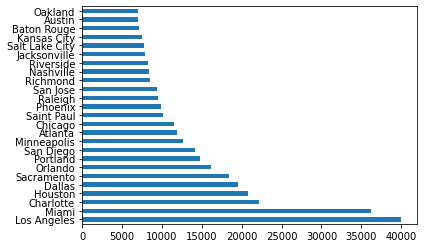

In [100]:
cities_by_accident[:25].plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


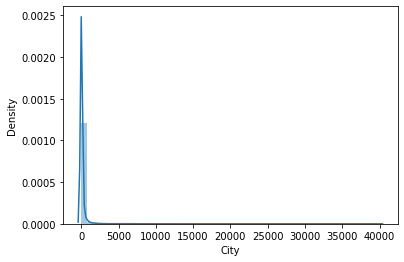

In [101]:
sns.distplot(cities_by_accident)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


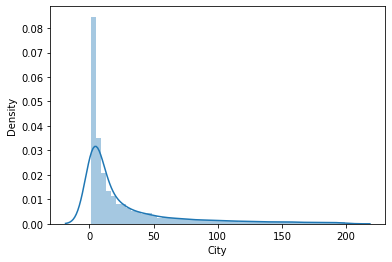

In [102]:
high_accident_cities = cities_by_accident[cities_by_accident>=1500]
low_accident_cities = cities_by_accident[cities_by_accident<200]
verylow_accident_cities=cities_by_accident[cities_by_accident<10]
sns.distplot(low_accident_cities)

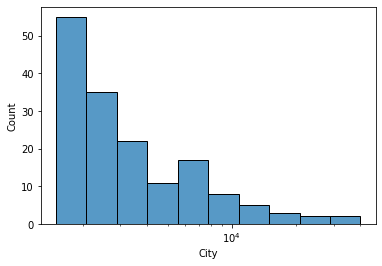

In [103]:
sns.histplot(high_accident_cities, log_scale=True)

No. of accidents per city changes exponentially between cities

In [104]:
vl=len(verylow_accident_cities)
print("{} cities has less than ten accidents in a year".format(vl))
vh_percent = len(high_accident_cities)/len(df)
print("{:%} cities has more than 1500 accidents in a year".format(vh_percent))

4704 cities has less than ten accidents in a year
0.010554% cities has more than 1500 accidents in a year


### Start Time

In [105]:
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

Q 4-6??


In [106]:
df.Start_Time[0].hour

0

In [107]:
df.Start_Time.dt.hour[1:5]

1    5
2    6
3    6
4    6
Name: Start_Time, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


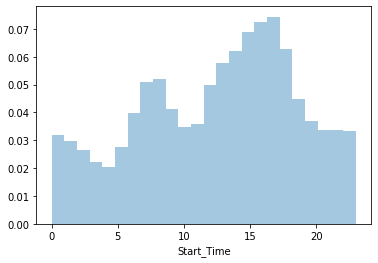

In [108]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde = False, norm_hist=True)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


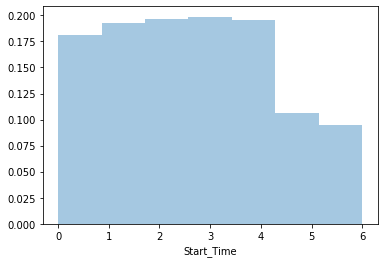

In [109]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde = False, norm_hist=True)

Note: check how can we adjust the bar spacing for distplot

Most accidents happen between 6am and 9am and between 1pm and 5pm  

Q 7?

No. of accidents are lower on weekends compared to weekdays

Q 8?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


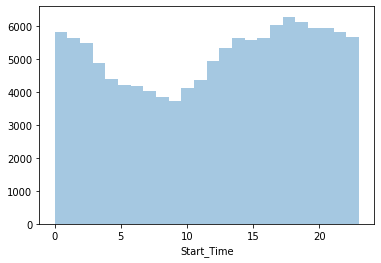

In [110]:
sunday_time= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday_time.dt.hour,kde=False,bins=24)

Accident peak hour seems to be between 3pm and 12am  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


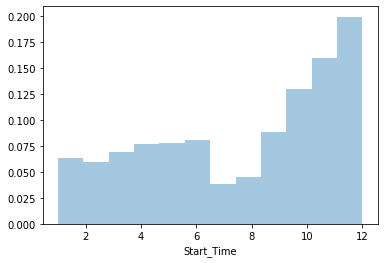

In [111]:

sns.distplot(df.Start_Time.dt.month, bins=12, kde = False, norm_hist=True)
plt.show()


Accidents more likely to happen in winter??


2020

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


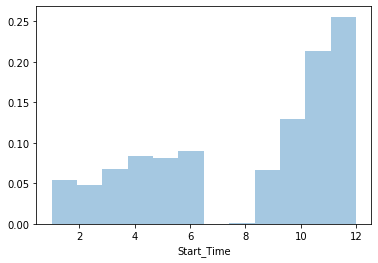

In [112]:
sns.distplot(df[df.Start_Time.dt.year==2020].Start_Time.dt.month,kde=False, bins = 12,norm_hist=True)

2019

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


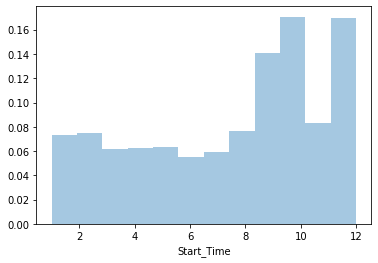

In [113]:
sns.distplot(df[df.Start_Time.dt.year==2019].Start_Time.dt.month,kde=False, bins = 12,norm_hist=True)

2018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


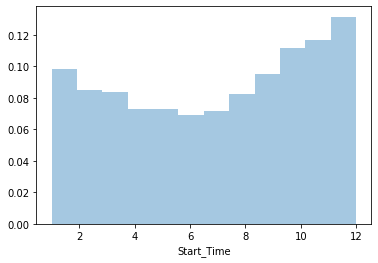

In [114]:
sns.distplot(df[df.Start_Time.dt.year==2018].Start_Time.dt.month,kde=False, bins = 12,norm_hist=True)

2017

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


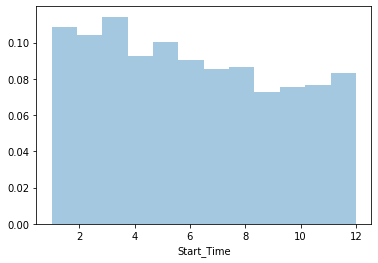

In [115]:
sns.distplot(df[df.Start_Time.dt.year==2017].Start_Time.dt.month,kde=False, bins = 12,norm_hist=True)

2016

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


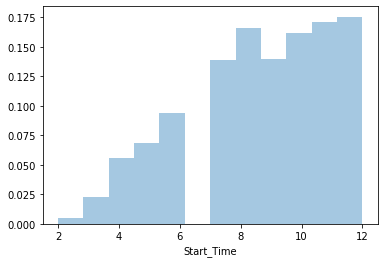

In [116]:
sns.distplot(df[df.Start_Time.dt.year==2016].Start_Time.dt.month,kde=False, bins = 12,norm_hist=True)

### Weather Condition

Seems like data for the year 2016 is incomplete. may be the survey started of only after the start of the year

In [117]:
weath_cond=df[df.Start_Time.dt.month.isin([1,8,9,10,11,12])].Weather_Condition.value_counts()
weath_cond[weath_cond>1000]

Fair                     329317
Mostly Cloudy            110499
Cloudy                   109348
Clear                     99735
Partly Cloudy             78493
Overcast                  49266
Light Rain                39381
Scattered Clouds          23840
Fog                       16324
Light Snow                14482
Haze                      13162
Rain                       9401
Fair / Windy               3601
Heavy Rain                 3503
Smoke                      3448
Light Drizzle              2582
Cloudy / Windy             2008
Mostly Cloudy / Windy      1940
Snow                       1297
Light Rain / Windy         1136
Partly Cloudy / Windy      1074
Wintry Mix                 1051
Name: Weather_Condition, dtype: int64

In [118]:
weath_cond=df[df.Start_Time.dt.month.isin([2,3,4,5,6,7])].Weather_Condition.value_counts()
weath_cond[weath_cond>1000]

Fair                     135935
Mostly Cloudy             83096
Clear                     80488
Partly Cloudy             54609
Cloudy                    51943
Overcast                  38587
Light Rain                33130
Scattered Clouds          23221
Rain                       7988
Light Snow                 7631
Haze                       4544
Fog                        3453
Fair / Windy               3030
Heavy Rain                 2616
Light Drizzle              1725
Mostly Cloudy / Windy      1672
Snow                       1433
Cloudy / Windy             1292
Partly Cloudy / Windy      1051
Name: Weather_Condition, dtype: int64

Looks like weather condition of winter has nothing to do with the accident cause as in both cases maximum accidents has occured in Fair, Cloudy and Clear weather conditions


In [119]:
weath_2020=df[df.Start_Time.dt.year==2020]
weath_cond=weath_2020[weath_2020.Start_Time.dt.month.isin([1,8,9,10,11,12])].Weather_Condition.value_counts()
weath_cond[weath_cond>1000]

Fair                     251192
Cloudy                    86451
Mostly Cloudy             58281
Partly Cloudy             36445
Light Rain                19847
Fog                       12117
Light Snow                 6789
Haze                       6703
Rain                       4284
Fair / Windy               2677
Smoke                      2330
Mostly Cloudy / Windy      1691
Cloudy / Windy             1637
Heavy Rain                 1559
Light Drizzle              1409
Name: Weather_Condition, dtype: int64

In [120]:
weath_2017=df[df.Start_Time.dt.year==2017]
weath_cond=weath_2017[weath_2017.Start_Time.dt.month.isin([1,8,9,10,11,12])].Weather_Condition.value_counts()
weath_cond[weath_cond>1000]

Clear               27313
Overcast            13592
Mostly Cloudy       10984
Partly Cloudy        7347
Scattered Clouds     7052
Light Rain           3662
Light Snow           1636
Name: Weather_Condition, dtype: int64

In [121]:
weath_2019=df[df.Start_Time.dt.year==2019]
weath_cond=weath_2019[weath_2019.Start_Time.dt.month.isin([1,8,9,10,11,12])].Weather_Condition.value_counts()
weath_cond[weath_cond>1000]

Fair             76823
Cloudy           22197
Partly Cloudy    17986
Mostly Cloudy    16822
Light Rain        6564
Clear             5221
Overcast          4187
Light Snow        3108
Haze              2708
Fog               2679
Rain              1845
Name: Weather_Condition, dtype: int64

In [122]:
weath_2018=df[df.Start_Time.dt.year==2018]
weath_cond=weath_2018[weath_2018.Start_Time.dt.month.isin([1,8,9,10,11,12])].Weather_Condition.value_counts()
weath_cond[weath_cond>1000]

Clear               33597
Overcast            18006
Mostly Cloudy       12173
Partly Cloudy        7636
Scattered Clouds     7348
Light Rain           5748
Haze                 2150
Light Snow           2043
Rain                 1466
Name: Weather_Condition, dtype: int64

###Correlation of various weather parameters

Lets plot a correlation matrix between Temperature, Wind_Chill, Humidity, Pressure, Visibility, Wind_Direction, Wind_Speed, Precipitation

In [123]:
corr_mat = df[['Severity','Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)', 'Precipitation(in)']].corr()
corr_mat

Severity  Temperature(F)  ...  Wind_Speed(mph)  Precipitation(in)
Severity           1.000000       -0.014952  ...         0.063576           0.015370
Temperature(F)    -0.014952        1.000000  ...         0.079064          -0.002094
Wind_Chill(F)     -0.091947        0.992669  ...        -0.022189          -0.014348
Humidity(%)        0.047240       -0.387202  ...        -0.160188           0.058425
Pressure(in)       0.055531        0.087518  ...        -0.013847           0.018282
Visibility(mi)     0.006275        0.188362  ...         0.030217          -0.088150
Wind_Speed(mph)    0.063576        0.079064  ...         1.000000           0.024711
Precipitation(in)  0.015370       -0.002094  ...         0.024711           1.000000

[8 rows x 8 columns]

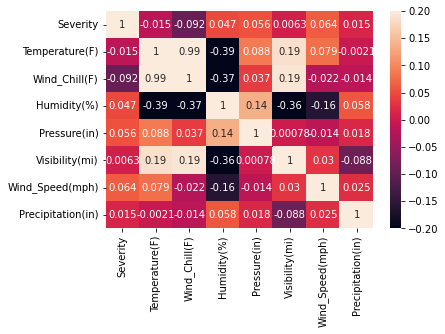

In [124]:
sns.heatmap(corr_mat,annot=True, vmin=-0.2,vmax=0.2)

No parameters of climatic condition seems to be highly correlated to the severity of the accident. So the climatic condition seems to have no significant role in increasing or decreasing the severity caused by the accudent.

###Distance

Is the length of the road extent affected by the accident and the severity correlated?

In [125]:
df['Distance(mi)'].corr(df['Severity'])

0.15286934034754995

The  length of the road extent affected by the accident seems to have a very slight correlation with the severity of the accident. This should be indicating the correlation of the speed of the car at the time of the accident with the severity

###Latitude and Longitude

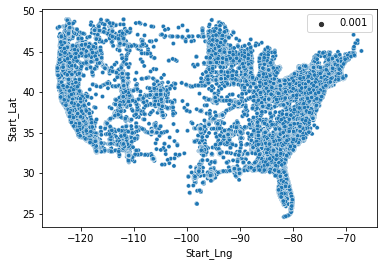

In [126]:
sns.scatterplot(x=sample_df.Start_Lng,y= sample_df.Start_Lat, size=0.001)

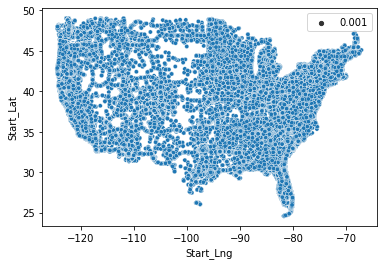

In [127]:
sns.scatterplot(x=df.Start_Lng,y= df.Start_Lat, size=0.001)

Plotting a map using folium library

In [128]:
import folium

In [129]:
map=folium.Map()
lat,lon= df.Start_Lat[0],df.Start_Lng[0]
marker=folium.Marker((lat,lon))
marker.add_to(map)
map

In [130]:
from folium.plugins import HeatMap
HeatMap(list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))).add_to(map)
map

## Ask and Answer Questions

1. Which States have highest accidents?

2. What time of the day is accidents more frequent in?

3. Which day of the week is accidents more frequent in?

4. Which months have more accidents?

5. Year wise trend of accidents(decreasing/increasing)?

6. At what hour of the day is accidents per unit traffic higher?(may need to include external dataset for traffic information)

7. Is the time of occurance of accidents on weekends same as on weekdays?

8. Does the climatic condition has any effect on the severity of the accident

9. Is the length of the road extent affected by the accident and the severity correlated?



## Summary and Conclusion
No data from New York

No. of accidents per city changes exponentially between cities

4704 cities has less than ten accidents in a year

0.010554% cities has more than 1500 accidents in 4 years(Investigate)

Accidents occur more on weekdays than on weekends

Accidents seems to occur more in winter

Climatic Condition is not a factor for increased accident during winter

Length of the road extent affected by the accident and severity seems to be related

##Few more questions to look into in future

1. Presence of landmarks or bumps and its effect on accident frequency/severity

2. If weather condition is not the reason, what is it that causes more accidents in winter?

3. Among the top 100 cities in accidents, which state do they belong to?

In [131]:
import jovian

In [132]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/gopushaji/us-accident-analysis


'https://jovian.ai/gopushaji/us-accident-analysis'